In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pickle


# define constants and other global variables
label_size = 28
tick_size = 20
title_size = 28
subtitle_size = 28
line_width = 4
legend_size = 20

## CIFAR

In [18]:
def plot_figure(pd_train, pd_mask, pd_wt_reinit, pd_wt_shuffle, name):

    fig, ax1 = plt.subplots(figsize=(15, 10))
    ax2 = ax1.twinx()

    ax1.plot(pd_train['epoch'], pd_train['test_acc_before_rounding'], linewidth=line_width-2, c='C0', label='prune+train (before rounding)', linestyle='dotted')#, marker='^', markersize=12)
    ax1.plot(pd_train['epoch'], pd_train['test_acc'], linewidth=line_width-2, c='C0', label='prune+train (after rounding) {:.2f}'.format(pd_train['test_acc'][299]), linestyle='-')#, marker='^', markersize=12)
    ax1.axhline(pd_train['test_acc'].max(), linewidth=line_width-2, c="C0", linestyle='--')
    ax1.text(50, pd_train['test_acc'].max() + 1, "{:.2f}".format(pd_train['test_acc'].max()), fontsize=tick_size, c="C0")
    ax2.plot(pd_train['epoch'], pd_train['model_sparsity'], linewidth=line_width-2, c='C1', linestyle='-')#, marker='^', markersize=12)

    train_start = 150
    ax1.plot(pd_mask['epoch'][train_start:], pd_mask['test_acc'][train_start:], linewidth=line_width-2, c='C2', label='mask shuffle {:.2f}'.format(pd_mask['test_acc'][299]), linestyle='-')#, marker='^', markersize=12)
    ax1.plot(pd_wt_reinit['epoch'][train_start:], pd_wt_reinit['test_acc'][train_start:], linewidth=line_width-2, c='C3', label='weight reinit {:.2f}'.format(pd_wt_reinit['test_acc'][299]), linestyle='-')#, marker='^', markersize=12)
    ax1.plot(pd_wt_shuffle['epoch'][train_start:], pd_wt_shuffle['test_acc'][train_start:], linewidth=line_width-2, c='C4', label='weight shuffle {:.2f}'.format(pd_wt_shuffle['test_acc'][299]), linestyle='-')#, marker='^', markersize=12)
    

    # plt.title("ResNet-20 on CIFAR-10", fontsize=title_size)
    plt.title(name, fontsize=title_size)
    ax1.tick_params(axis='both', labelsize=tick_size)
    ax2.tick_params(axis='both', labelsize=tick_size)

    ax1.set_xlabel("Epoch ", fontsize=label_size)
    ax1.set_ylabel("Test Accuracy", fontsize=label_size, color='C0')
    ax2.set_ylabel("Model Sparsity", fontsize=label_size, color='C1')

    #ax2.set_ylim([0, 55])
    ax1.set_ylim([10, 95])
    #ax1.set_xlim([0,152])
    ax1.legend(fontsize=legend_size, loc='center left', bbox_to_anchor=(1.1, 0.8))#, loc='right')
    ax1.grid(True)
    #ax2.grid(True)

    plt.savefig('{}.pdf'.format(name), dpi=400)
    #plt.savefig('DG (follow low positive) .jpg', dpi=400)

In [19]:
def read_files(result_prefix):
    pd_train = pd.read_csv(os.path.join(result_prefix, 'acc_and_sparsity.csv'))
    pd_mask = pd.read_csv(os.path.join(result_prefix, 'acc_and_sparsity_mask_shuffle.csv'))
    pd_wt_reinit = pd.read_csv(os.path.join(result_prefix, 'acc_and_sparsity_weight_reinit.csv'))
    pd_wt_shuffle = pd.read_csv(os.path.join(result_prefix, 'acc_and_sparsity_weight_shuffle.csv'))
    return pd_train, pd_mask, pd_wt_reinit, pd_wt_shuffle

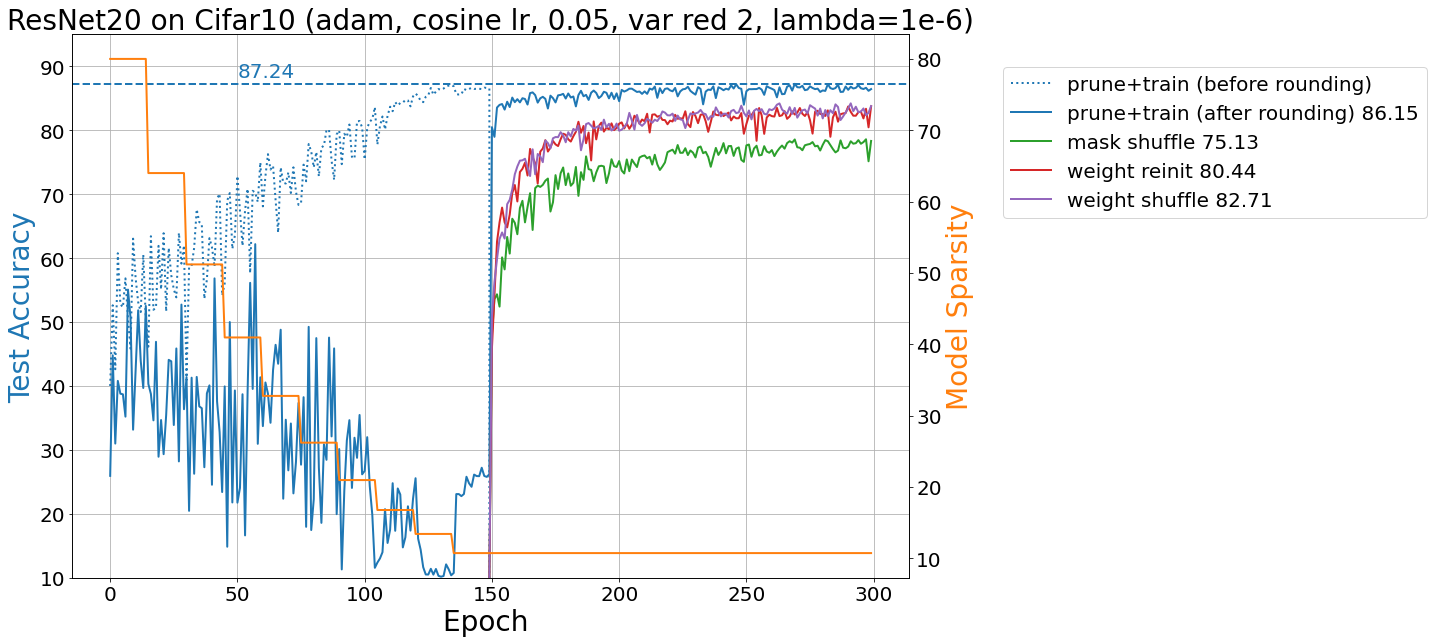

In [22]:

result_prefix = 'results/results_pruning_CIFAR10_resnet20_hc_iter_15_reg_var_red_2_1e-06_adam_cosine_lr_0_05_0_1_50_fan_False_signed_constant_unif_width_1_0_seed_42/'
pd_train, pd_mask, pd_wt_reinit, pd_wt_shuffle = read_files(result_prefix)
plot_figure(pd_train, pd_mask, pd_wt_reinit, pd_wt_shuffle, name="ResNet20 on Cifar10 (adam, cosine lr, 0.05, var red 2, lambda=1e-6)")


## MNIST

In [ ]:
# get all file names in directory
path = 'results/MNIST'
extension = 'csv'
os.chdir(path)
filenames = glob.glob('*.{}'.format(extension))

# read in each csv
csv_dict = {}
for file in filenames:
    print(file)
    csv_dict[file] = pd.read_csv(file)
    ignore_rows = (csv_dict[file].epoch < 1) & (csv_dict[file].epoch > 0)
    ignore_rows = ignore_rows.index[ignore_rows == True]
    csv_dict[file].drop(index=ignore_rows, inplace=True)

In [ ]:
files_FC = [    'hc_iter_period_1_adam_lr_1e-2_100epoch.csv',
                'hc_vanilla.csv',
                'hc_rewind_iter_period_1.csv',
                'vanilla_ep_sparsity_0.9.csv',
                'vanilla_ep_sparsity_0.5.csv',
                'lth_iter5.csv',
                'hc_iter_period_5_adam_lr_1e-2_100epoch.csv',
                'hc_iter_period_1_switch_to_wt_at_50_epoch_to_100.csv',
                'hc_iter_period_5_switch_to_wt_at_50_epoch_to_100.csv'
           ]

df0 = csv_dict[files_FC[0]]
df1 = csv_dict[files_FC[1]]
df2 = csv_dict[files_FC[2]]
df3 = csv_dict[files_FC[3]]
df4 = csv_dict[files_FC[4]]
df5 = csv_dict[files_FC[5]]
df6 = csv_dict[files_FC[6]]
df7 = csv_dict[files_FC[7]]
df8 = csv_dict[files_FC[8]]
# df9 = csv_dict[files_FC[9]]

In [ ]:
df7['test_acc'][80:100]

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

ax1.plot(df5['epoch'], df5['test_acc'], linewidth=line_width-2, c='C0', label='IMP (50 epochs, Prune every T=5 epochs)', linestyle='dotted')#, marker='^', markersize=12)
ax2.plot(df5['epoch'], df5['model_sparsity'], linewidth=line_width-2, c='C1', label='Weak LTH (w/ rewinding, Prune every 5 epochs)', linestyle='dotted')#, marker='^', markersize=12)

ax1.plot(df7['epoch'], df7['test_acc'], linewidth=line_width-2, c='C0', label='HyperCube (50 epochs, T=1) + Weight Training (50 epochs)', linestyle='solid')
ax2.plot(df7['epoch'], df7['model_sparsity'], linewidth=line_width-2, c='C1', label='HyperCube (50 epochs, T=1) + Weight Training (50 epochs)', linestyle='solid')

#ax1.plot(df8['epoch'], df8['test_acc'], linewidth=line_width-2, c='C0', label='HyperCube (50 epochs, T=5) + Weight Training (50 epochs)', linestyle='dashed')
#ax2.plot(df8['epoch'], df8['model_sparsity'], linewidth=line_width-2, c='C1', label='HyperCube (50 epochs, T=5) + Weight Training (50 epochs)', linestyle='dashed')



#ax1.plot(df1['epoch'], df1['test_acc'], linewidth=line_width-2, c='C0', label='HyperCube (vanilla)', linestyle='dashed')#(0, (1, 10)))
#ax2.plot(df1['epoch'], df1['model_sparsity'], linewidth=line_width-2, c='C1', label='HyperCube (vanilla)', linestyle='dashed')#(0, (1, 10)))

#ax1.plot(df2['epoch'], df2['test_acc'], linewidth=line_width-2, c='C0', label='HyperCube (iterative, w/ rewinding)', linestyle='dotted')
#ax2.plot(df2['epoch'], df2['model_sparsity'], linewidth=line_width-2, c='C1', label='HyperCube (iterative, w/ rewinding)', linestyle='dotted')

#ax1.plot(df6['epoch'], df6['test_acc'], linewidth=line_width-2, c='C0', label='HyperCube (Prune every 5 epoch)', linestyle='dashed')#', w/o rewinding)')
#ax2.plot(df6['epoch'], df6['model_sparsity'], linewidth=line_width-2, c='C1', label='HyperCube (Prune every 5 epoch)', linestyle='dashed') #, w/o rewinding)')

#ax1.plot(df0['epoch'], df0['test_acc'], linewidth=line_width-2, c='C0', label='HyperCube (Prune every 1 epoch)')#', w/o rewinding)')
#ax2.plot(df0['epoch'], df0['model_sparsity'], linewidth=line_width-2, c='C1', label='HyperCube (Prune every 1 epoch)') #, w/o rewinding)')





#ax1.plot(df4['epoch'], df4['test_acc'], linewidth=line_width-2, c='C0', label='Edge-Popup (50% sparsity)', linestyle='dashdot', marker='^', markersize=12)
#ax1.plot(df3['epoch'], df3['test_acc'], linewidth=line_width-2, c='C0', label='Edge-Popup (10% sparsity)', linestyle='dashdot', marker='o', markersize=12)






#ax1.plot(df2['epoch'], df2['test_acc'], linewidth=line_width-2, c='C2', label='DG (50% init sparsity, 25% importance)')
# ax1.plot(df3['epoch'], df3['test_acc'], linewidth=line_width-2, c='C3', label='DG (0.1% init sparsity, 25% importance)')
# ax1.plot(df4['epoch'], df4['test_acc'], linewidth=line_width-2, c='C4', label='DG (50% init sparsity, 25% importance, combination test)')

# ax1.plot(df9['epoch'], df9['test_acc'], linewidth=line_width-2, c='C9', label='DG (0.1% init sparsity, 25% importance)')
# ax1.plot(df2['epoch'], df2['test_acc'], linewidth=line_width-2, c='C2', label='DG')
# ax1.plot(df5['epoch'], df5['test_acc'], linewidth=line_width-2, c='C5', label='DG (10 epoch) + DG-low (q=0.25)')
# ax1.plot(df6['epoch'], df6['test_acc'], linewidth=line_width-2, c='C6', label='DG-low (q=0.5)')
# ax1.plot(df7['epoch'], df7['test_acc'], linewidth=line_width-2, c='C7', label='DG-low (q=0.25)')
# ax1.plot(df8['epoch'], df8['test_acc'], linewidth=line_width-2, c='C8', label='DG-low (q=0.1)')




####ax1.plot(df4['epoch'], df4['test_acc'], linewidth=line_width-2, c='C4', label='DG (50% init sparsity, 10% importance)')



plt.title("RamanujanNet on MNIST", fontsize=title_size)
ax1.tick_params(axis='both', labelsize=tick_size)
ax2.tick_params(axis='both', labelsize=tick_size)

ax1.set_xlabel("Epoch ", fontsize=label_size)
ax1.set_ylabel("Test Accuracy", fontsize=label_size, color='C0')
ax2.set_ylabel("Model Sparsity", fontsize=label_size, color='C1')

ax2.set_ylim([0, 50])
ax1.set_ylim([93, 100])
#ax1.set_xlim([0,52])
ax1.legend(fontsize=legend_size, loc='center left', bbox_to_anchor=(1.1, 0.8))#, loc='right')
ax1.grid(True)
ax2.grid(True)
plt.savefig('HC variants.jpg', dpi=400)
#plt.savefig('DG (follow low positive) .jpg', dpi=400)